In [1]:
#installing the Kaggle library
!pip install kaggle

In [12]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

Importing the DOG vs CAT Dataset from kaggle


In [13]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:13<00:00, 142MB/s]
100% 812M/812M [00:13<00:00, 63.6MB/s]


In [14]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [15]:
#Extracting the compressed dataset
from zipfile import  ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [16]:
#Extracting the compressed dataset
from zipfile import  ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [17]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images:', file_count)

number of images: 25000


Printing the name of images

In [18]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.9925.jpg', 'cat.8736.jpg', 'cat.10127.jpg', 'cat.7527.jpg', 'cat.796.jpg', 'dog.5717.jpg', 'dog.1086.jpg', 'dog.1897.jpg', 'dog.1420.jpg', 'cat.6182.jpg', 'dog.9503.jpg', 'dog.2022.jpg', 'dog.9695.jpg', 'dog.10006.jpg', 'cat.6768.jpg', 'cat.4816.jpg', 'dog.4905.jpg', 'dog.11166.jpg', 'dog.625.jpg', 'dog.1205.jpg', 'dog.11518.jpg', 'cat.3877.jpg', 'cat.656.jpg', 'cat.6306.jpg', 'cat.2606.jpg', 'cat.11180.jpg', 'dog.5854.jpg', 'dog.9666.jpg', 'dog.11917.jpg', 'dog.6066.jpg', 'dog.7265.jpg', 'cat.5207.jpg', 'dog.750.jpg', 'cat.3339.jpg', 'dog.1621.jpg', 'cat.8758.jpg', 'cat.6466.jpg', 'cat.3215.jpg', 'dog.10958.jpg', 'cat.5674.jpg', 'cat.4005.jpg', 'dog.1975.jpg', 'dog.8958.jpg', 'dog.5112.jpg', 'cat.3069.jpg', 'dog.2765.jpg', 'cat.11589.jpg', 'cat.10465.jpg', 'dog.10504.jpg', 'cat.9259.jpg', 'cat.3050.jpg', 'dog.4779.jpg', 'cat.10932.jpg', 'cat.3549.jpg', 'dog.9805.jpg', 'cat.9952.jpg', 'dog.10719.jpg', 'cat.7373.jpg', 'dog.5140.jpg', 'dog.12327.jpg', 'cat.6692.jpg', 'dog.5025.jpg'

importint the Dependancies

In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cat

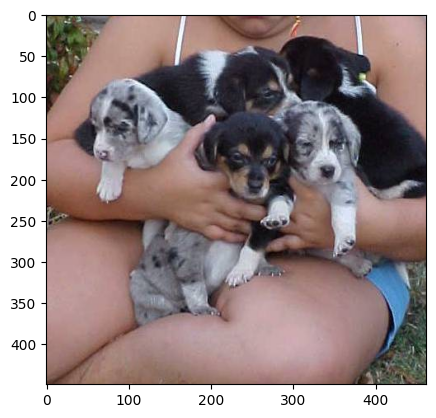

In [21]:
#display DoG image
img = mpimg.imread('/content/train/dog.9285.jpg')
imgplt = plt.imshow(img)
plt.show()


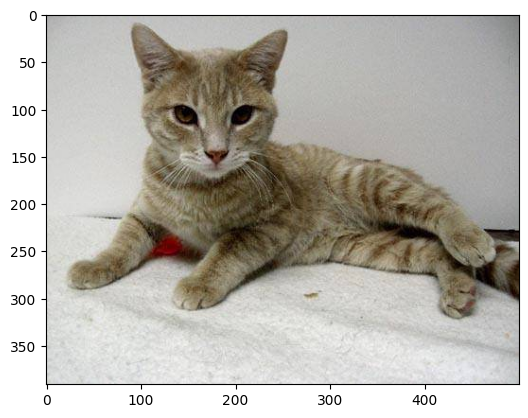

In [22]:
#display Cat image
img = mpimg.imread('/content/train/cat.8227.jpg')
imgplt = plt.imshow(img)
plt.show()


In [23]:
file_names = os.listdir('/content/train')

for i in range(5):

  name =  file_names[i]

  print(name[0:3])

dog
cat
cat
cat
cat


In [24]:
file_names = os.listdir('/content/train')

dog_count = 0

cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [25]:
#Creating a directory for resized images
os.mkdir('/content/image resized')

In [26]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath =  resized_folder + filename
  img.save(newImgPath)

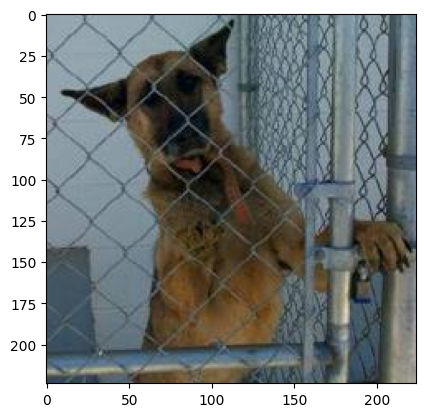

In [28]:
#display resized DoG image
img = mpimg.imread('/content/image resized/dog.6066.jpg')
imgplt = plt.imshow(img)
plt.show()

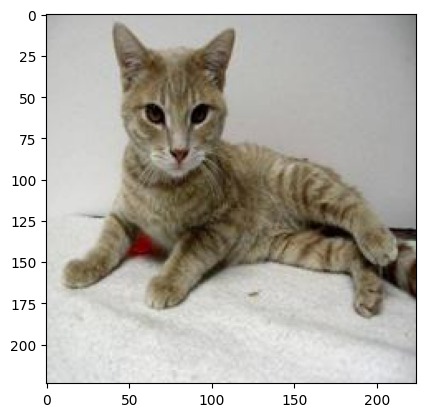

In [29]:
#display resized DoG image
img = mpimg.imread('/content/image resized/cat.8227.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dog and cat

Cat ..... > 0
Dog ..... > 1

In [30]:
#Creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')
labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)


In [31]:
print(filenames[0:5])
print(len(filenames))

['dog.9925.jpg', 'cat.8736.jpg', 'cat.10127.jpg', 'cat.7527.jpg', 'cat.796.jpg']
2000


In [32]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 0]
2000


In [33]:
#Counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 996 1004]


Converting all the resized images to numpy arrays

In [34]:
import cv2
import glob

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
dog_cat_images

array([[[[ 17,  20,  25],
         [ 17,  20,  25],
         [ 19,  22,  27],
         ...,
         [ 30,  48,  59],
         [ 28,  46,  57],
         [ 26,  44,  55]],

        [[ 20,  23,  28],
         [ 20,  23,  28],
         [ 21,  24,  29],
         ...,
         [ 33,  51,  62],
         [ 31,  49,  60],
         [ 29,  47,  58]],

        [[ 20,  23,  28],
         [ 21,  24,  29],
         [ 22,  25,  30],
         ...,
         [ 42,  60,  71],
         [ 40,  58,  69],
         [ 39,  57,  68]],

        ...,

        [[ 36,  61, 111],
         [ 41,  66, 116],
         [ 32,  57, 107],
         ...,
         [ 22,  48,  88],
         [ 20,  46,  86],
         [ 17,  43,  83]],

        [[ 37,  62, 112],
         [ 38,  63, 113],
         [ 27,  52, 102],
         ...,
         [ 24,  50,  90],
         [ 18,  44,  84],
         [ 11,  37,  77]],

        [[ 36,  61, 111],
         [ 35,  60, 110],
         [ 24,  49,  99],
         ...,
         [ 26,  52,  92],
        

In [37]:
type(dog_cat_images)

numpy.ndarray

In [38]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [39]:
X = dog_cat_images
Y = np.asarray(labels)

In [40]:
Y

array([1, 0, 0, ..., 0, 1, 1])

Train Test Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 )

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 ...> Training Images
400 ....> Test Images

In [43]:
#Scaling the Data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

Y_train_scaled = Y_train/255

Y_test_scaled = Y_test/255

In [44]:
Y_train_scaled

array([0.00392157, 0.        , 0.00392157, ..., 0.00392157, 0.        ,
       0.00392157])

print("Flattening images...")
images_ reshape = X_train_scaled.reshape(len(X_train_scaled), -1)
print(f"Flattened images shape: {images_flat.shape}")

In [45]:
print("Flattening images...")
X_Timages_reshape = X_train_scaled.reshape(len(X_train_scaled), -2)
print(f"Flattened images shape: {X_Timages_reshape.shape}")

Flattening images...
Flattened images shape: (1600, 150528)


In [46]:
print("Flattening images...")
X_Ttimages_reshape = X_test_scaled.reshape(len(X_test_scaled), -2)
print(f"Flattened images shape: {X_Ttimages_reshape.shape}")

Flattening images...
Flattened images shape: (400, 150528)


In [47]:
print("Flattening images...")
YTtimages_reshape = Y_test_scaled.reshape(len(Y_test_scaled), -2)
print(f"Flattened images shape: {YTtimages_reshape.shape}")

Flattening images...
Flattened images shape: (400, 1)


In [48]:
print("Flattening images...")
Y_Timages_reshape = Y_train_scaled.reshape(len(Y_train_scaled), -2)
print(f"Flattened images shape: {Y_Timages_reshape.shape}")

Flattening images...
Flattened images shape: (1600, 1)


In [57]:
#print(X_train_scaled)

Building the Support Vector Machine Model

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
print("Training SVM model...")
svm = SVC(kernel='linear')
svm.fit(X_Timages_reshape, Y_train)
print("SVM model trained.")

Training SVM model...
SVM model trained.


In [52]:
# Step 6: Evaluate Model
print("Evaluating model...")
y_pred = svm.predict(X_Ttimages_reshape)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(Y_test, y_pred, target_names =filenames))

print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Evaluating model...
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.54       202
           1       0.52      0.48      0.50       198

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400

Confusion Matrix:
[[112  90]
 [102  96]]


In [ ]:
#Rerun without scaling the data using the same configuration and assess the accuracy

In [60]:
# Step 7: Visualize Results (Optional)
def plot_images(img, labels, preds):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i], cmap=plt.cm.binary)
        plt.xlabel(f"True: {filesnames[labels[i]]}\nPred: {filenames[preds[i]]}")
    plt.show()